# Facebook's Prophet Library

## Importing the data

👇 Go on [trends.google.com](https://trends.google.com/trends/?geo=US) and retrieve the dataset representing the interest over time of the keyword `data science` since 2004 in the US. Once you get the dataset, import the data and display the first few rows

In [707]:
import pandas as pd
df = pd.read_csv('data.csv')

## Display the data

👇Visualize the data by displaying the first few rows of the dataframe

In [708]:
df.head()

,Mois,data_science
0,2004-01,9
1,2004-02,17
2,2004-03,11
3,2004-04,14
4,2004-05,8


## Data Preprocessing

Facebook'Prophet library requires the data to be in a specific format. 

👇 Format the dataset as per Facebook Prophet's requirements.
Remember the dataframe should have a `ds` and `y` columns

In [709]:
#df = df.rename(columns={'Mois': 'ds', 'data_science': 'y'})
df = df[:-1]
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

## Plotting the data

👇 Plot the data

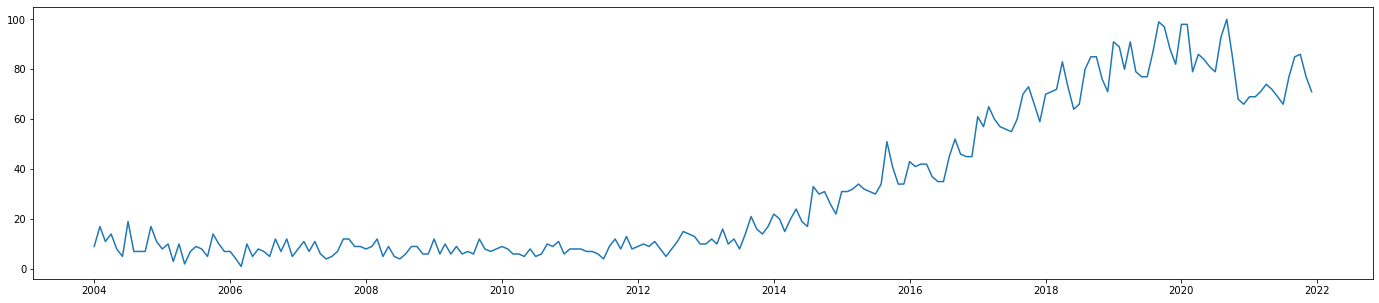

In [710]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,5))
plt.plot(df.ds, df.y) #ax = df.set_index('ds').plot(figsize=(24,5))
#ylabel('Monthly Number of Search'); set_xlabel('Date')

## Fitting the data

👇 Fit the data using Facebook's Prophet library. Make sure to use a train/test split

In [711]:
from fbprophet import Prophet

df_train = df[:-24]
df_test = df[-24:]

m = Prophet(yearly_seasonality=7, weekly_seasonality=True, daily_seasonality=True, 
            seasonality_mode='multiplicative', seasonality_prior_scale=0.7, interval_width=0.95, 
            growth='linear', changepoint_prior_scale=0.7, changepoint_range=0.99)

m.add_seasonality(name='monthly', period=30.5, fourier_order=12, prior_scale=0.5, mode='additive')
m.add_seasonality('weekly', period=7, fourier_order=7, prior_scale=0.5, mode='additive')

m.fit(df_train)

## Make future predictions

👇Before predicting future values with Facebook's Prophet library, you first need to create a placeholder dataframe that will eventually hold the predictions. Once you create the dataframe, try to predict 2 years in the future.

You can create the predictions' dataframe using `make_future_dataframe()`

In [712]:
future = m.make_future_dataframe(periods=24, freq='MS')

In [713]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(3)

,ds,yhat,yhat_lower,yhat_upper
0,2004-01-01,11.457268,6.818658,15.893776
1,2004-02-01,15.866499,11.397495,20.724559
2,2004-03-01,11.697365,7.065616,16.159536


## Plotting the forecast

👇 It's time to visualize our forecast. Make use of the handy [`model.plot(forecast)`](https://facebook.github.io/prophet/docs/quick_start.html)

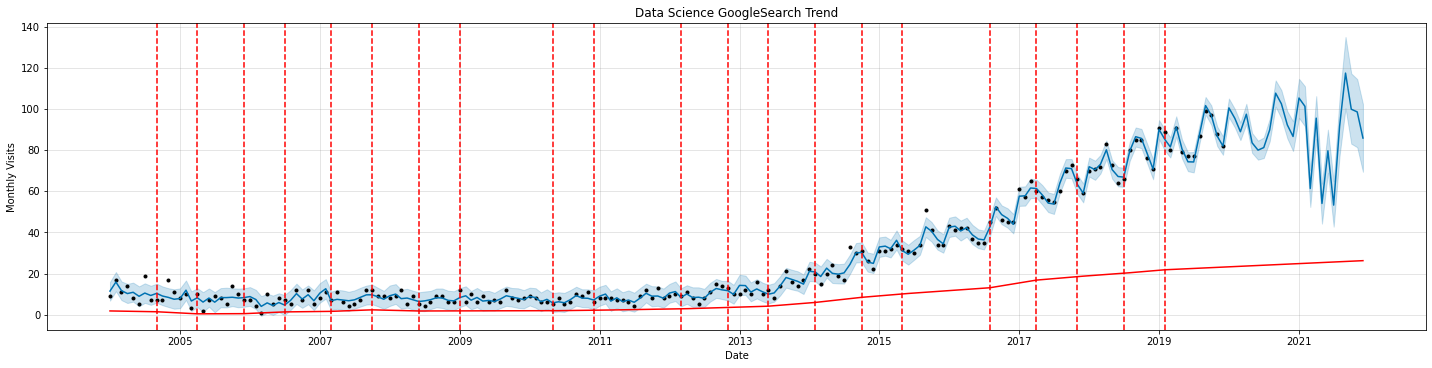

In [714]:
from fbprophet import plot
from fbprophet.plot import add_changepoints_to_plot

#m.plot(forecast, figsize=(20, 5))
fig = m.plot(forecast, uncertainty=True, figsize=(20, 5), xlabel='Date', ylabel='Monthly Visits')
plt.title('Data Science GoogleSearch Trend');
a = add_changepoints_to_plot(fig.gca(), m, forecast)

👉 From 2004 to 2018 we can see the train data and the forecasted data from 2018 to 2020.

We can also notice a shaded region behind the plot which represents the 95% uncertainty interval.

The black dots represent the original data

## Time Series' trend and seasonality

👇 Plot the trend and yearly seasonality of the time series. This can be done using the `plot_components()` function from Facebook's Prophet Library

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


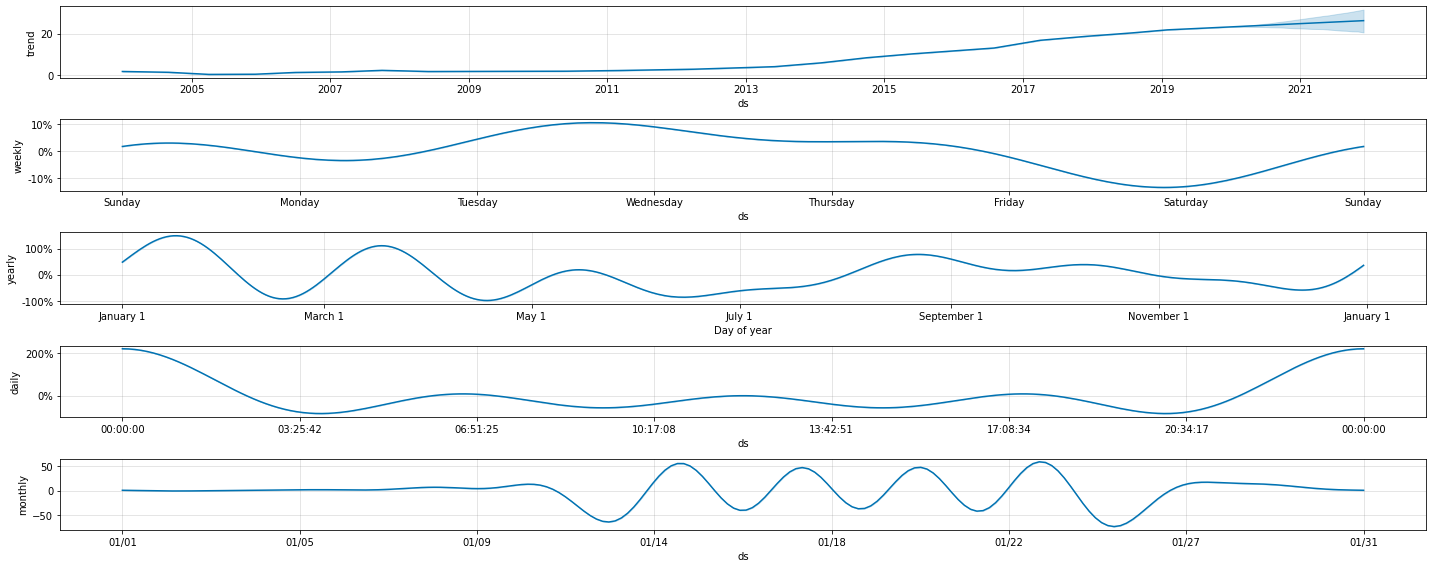

In [715]:
fig2 = m.plot_components(forecast, figsize=(20, 8))

In [716]:
df_merge = pd.merge(df, forecast[['ds','yhat_lower','yhat_upper','yhat']], on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2004-01-01,6.818658,15.893776,11.457268,9
1,2004-02-01,11.397495,20.724559,15.866499,17
2,2004-03-01,7.065616,16.159536,11.697365,11
3,2004-04-01,5.655291,14.958319,10.259693,14
4,2004-05-01,6.332902,15.572028,10.874988,8


In [717]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

cmp_df = make_comparison_dataframe(df, forecast)

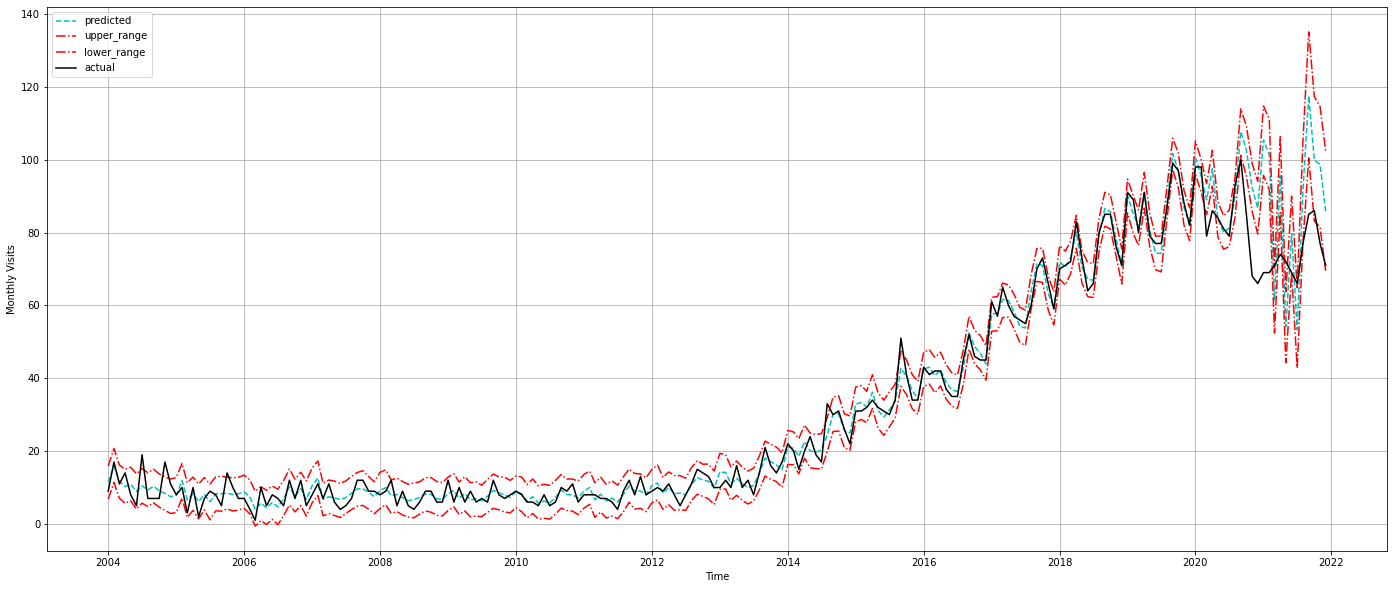

In [718]:
plt.figure(figsize=(24, 10))
plt.plot(cmp_df['yhat'], 'c--', label='predicted')
plt.plot(cmp_df['yhat_lower'],'r-.', label='upper_range')
plt.plot(cmp_df['yhat_upper'],'r-.', label='lower_range')
plt.plot(cmp_df['y'], 'k', label='actual')
plt.xlabel('Time'), plt.ylabel('Monthly Visits')
plt.legend()
plt.grid(True)
plt.show()

In [719]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
mape, mae

(0.1860821804574369, 3.240731930439922)

In [720]:
####### revoir site pour terminer #######

In [721]:
import numpy as np
def calculate_forecast_errors(df, prediction_size):
    df = df.copy()
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-prediction_size:]
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [722]:
for err_name, err_value in calculate_forecast_errors(cmp_df, 216).items():
    print(err_name, err_value)

MAPE 18.60821804574368
MAE 3.2407319304399205


In [723]:
for err_name, err_value in calculate_forecast_errors(cmp_df, 24).items():
    print(err_name, err_value)

MAPE 19.12209151770622
MAE 14.265653367540297


## Evaluating the model with cross-validation!

👇 Using `cross_validation` and `performance_metrics` from [fbprophet.diagnostics](https://facebook.github.io/prophet/docs/diagnostics.html), evaluate the performance of your model
<img src='https://facebook.github.io/prophet/static/diagnostics_files/diagnostics_3_0.png'>

More precisely, create a Time Series K-fold CV with
- train sets of size 5 years
- horizon val sizes of 1 years
- shifting each fold by 180 days

In [724]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

df_cv = cross_validation(m, initial='1800 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 21 forecasts with cutoffs between 2009-01-22 00:00:00 and 2018-12-01 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2009-02-01,6.611862,2.827572,10.110153,6,2009-01-22
1,2009-03-01,6.443229,2.739836,10.521439,10,2009-01-22
2,2009-04-01,8.414922,4.545586,12.349322,6,2009-01-22
3,2009-05-01,6.219243,2.118190,10.286265,9,2009-01-22
4,2009-06-01,8.265404,4.437033,11.853948,6,2009-01-22


In [725]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,35.645861,5.970415,4.364405,0.231221,0.152022,0.68
1,41 days,31.344488,5.598615,3.972799,0.180056,0.144367,0.72
2,42 days,36.102045,6.008498,4.274883,0.193687,0.144367,0.68
3,43 days,37.920957,6.157999,4.481107,0.237307,0.152022,0.64
4,46 days,37.947878,6.160185,4.504205,0.235588,0.152022,0.64


C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


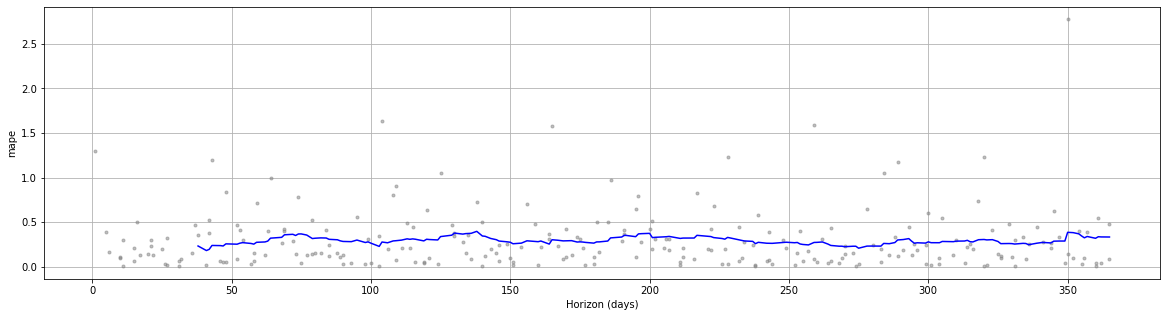

In [726]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape',figsize=(20, 5))

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


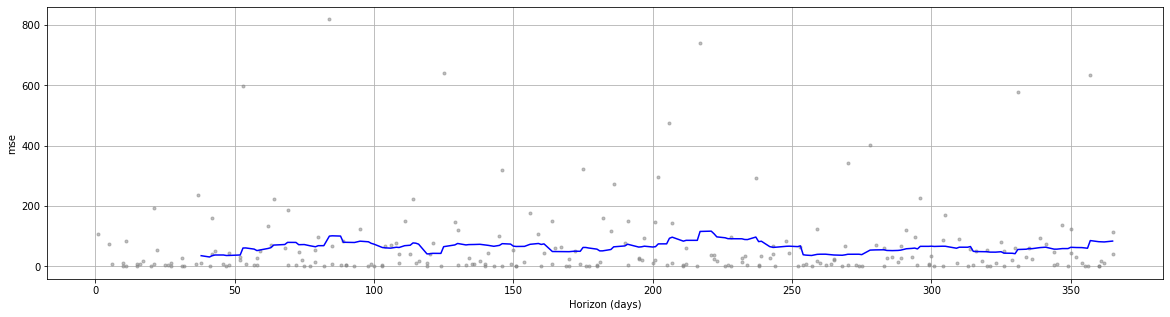

In [727]:
fig = plot_cross_validation_metric(df_cv, metric='mse', figsize=(20, 5))

⚠️ Don't forget to push the challenge to GitHub once you're done 😄